# Modelo para testar a hipótese "Período de férias (julho,  janeiro, fevereiro) e o dia da semana tem impacto sobre o número diário de casos para cada natureza de crime?"

## Import das bibliotecas e dos dados

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels as lm

pd.set_option('display.max_columns', None)
path = os.path.abspath('../data/analise_crime_filtrado.csv')
df = pd.read_csv(path,comment='#', low_memory=False, parse_dates=['OCORRENCIA_DATA_SEM_HORARIO'])

## Visualizando os dados

In [192]:
df.head()

,OCORRENCIA_CODIGO,NATUREZA1_DESCRICAO,NATUREZA,ATENDIMENTO_BAIRRO_NOME,REGIONAL_FATO_NOME,OCORRENCIA_ANO,OCORRENCIA_DATA,OCORRENCIA_HORA,OCORRENCIA_HORA_SEM_MINUTO,OCORRENCIA_MES,OCORRENCIA_DIA_SEMANA,OCORRENCIA_DATA_SEM_HORARIO,FERIADO,LATITUDE,LONGITUDE
0,5122.0,Roubo,ROUBO,XAXIM,BOQUEIRÃO,2009.0,2009-03-13 09:20:00.000,09:20:00,9,3.0,SEXTA,2009-03-13,0.0,-25.426683,-49.272357
1,5507.0,Atos obscenos/libidinosos,PUDOR,BAIRRO ALTO,BOA VISTA,2009.0,2009-03-19 12:05:00.000,12:05:00,12,3.0,QUINTA,2009-03-19,0.0,-25.412337,-49.205083
2,4899.0,Embriaguez,RISCO_VIDA,FAZENDINHA,PORTÃO,2009.0,2009-03-09 14:00:00.000,14:00:00,14,3.0,SEGUNDA,2009-03-09,0.0,NaN,NaN
3,5401.0,Furto,ROUBO,FAZENDINHA,PORTÃO,2009.0,2009-03-16 20:11:00.000,20:11:00,20,3.0,SEGUNDA,2009-03-16,0.0,NaN,NaN
4,3084.0,Ameaça,AGRESSAO,BOA VISTA,BOA VISTA,2009.0,2009-02-13 08:10:00.000,08:10:00,8,2.0,SEXTA,2009-02-13,0.0,-25.393377,-49.259794


In [193]:
df['OCORRENCIA_DIA_SEMANA'] = pd.Categorical(df['OCORRENCIA_DIA_SEMANA'],
                                   categories=['SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO', 'DOMINGO'],
                                   ordered=True)

## Casos por dia da semana

In [194]:
df2 = df.groupby(["NATUREZA", "OCORRENCIA_DIA_SEMANA"]).size().reset_index(name = 'CASOS')

df2

,NATUREZA,OCORRENCIA_DIA_SEMANA,CASOS
0,AGRESSAO,SEGUNDA,1918
1,AGRESSAO,TERÇA,2081
2,AGRESSAO,QUARTA,2065
3,AGRESSAO,QUINTA,2142
4,AGRESSAO,SEXTA,2263
...,...,...,...
58,SEQUESTRO,QUARTA,70
59,SEQUESTRO,QUINTA,60
60,SEQUESTRO,SEXTA,56
61,SEQUESTRO,SÁBADO,58


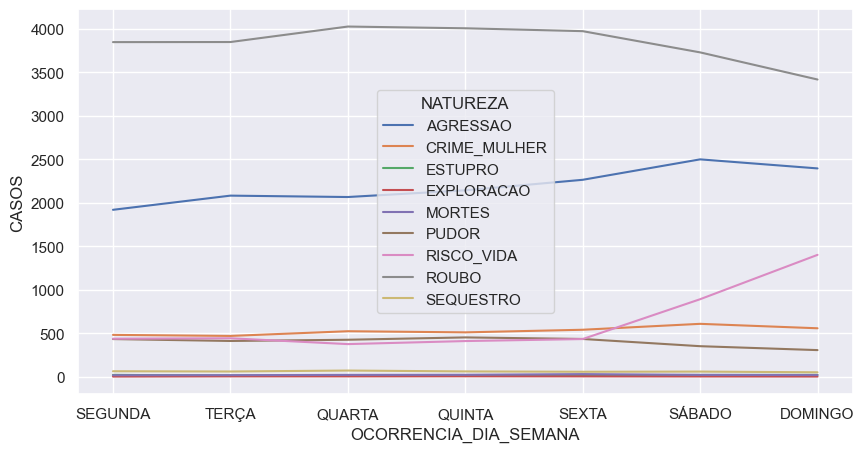

In [195]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(x="OCORRENCIA_DIA_SEMANA", y='CASOS', hue="NATUREZA", data=df2)

## Casos por mês do ano

In [196]:
df3 = df.groupby(["NATUREZA", "OCORRENCIA_MES"]).size().reset_index(name = 'CASOS')

df3

,NATUREZA,OCORRENCIA_MES,CASOS
0,AGRESSAO,1.0,1375
1,AGRESSAO,2.0,1294
2,AGRESSAO,3.0,1423
3,AGRESSAO,4.0,1316
4,AGRESSAO,5.0,1181
...,...,...,...
100,SEQUESTRO,8.0,45
101,SEQUESTRO,9.0,34
102,SEQUESTRO,10.0,46
103,SEQUESTRO,11.0,40


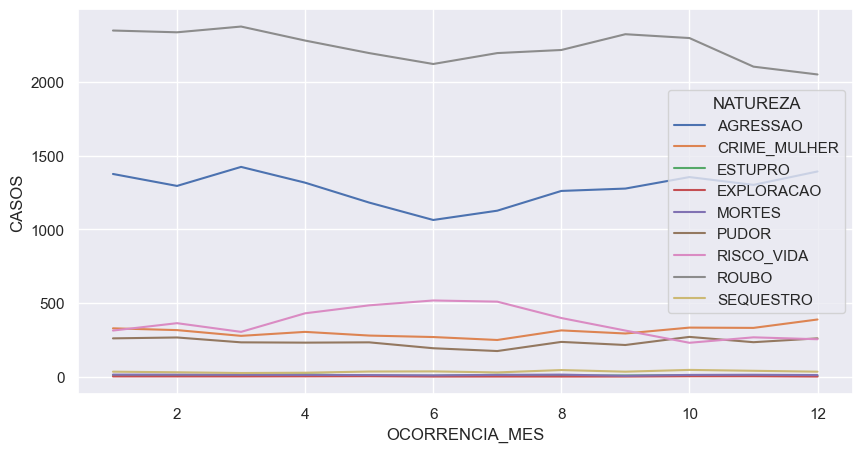

In [119]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(x="OCORRENCIA_MES", y='CASOS', hue="NATUREZA", data=df3)

## Finais de semana e períodos de férias

In [199]:
df4 = df.groupby(["NATUREZA", "OCORRENCIA_MES", "OCORRENCIA_DIA_SEMANA"]).size().reset_index(name = 'CASOS')

def ferias(row):
    if row['OCORRENCIA_MES'] in (7.0, 12.0, 1.0) :
        val = 1
    else:
        val = 0
    return val

df4['FERIAS'] = df4.apply(ferias, axis=1)

def fds(row):
    if row['OCORRENCIA_DIA_SEMANA'] in ('SÁBADO', 'DOMINGO') :
        val = 1
    else:
        val = 0
    return val

df4['FIM_DE_SEMANA'] = df4.apply(fds, axis=1)

casos_max = df4['CASOS'].max()
casos_min= df4['CASOS'].min()

df4['CASOS_NORMALIZADOS'] = (df4['CASOS']-casos_min)/(casos_max-casos_min)

df4

,NATUREZA,OCORRENCIA_MES,OCORRENCIA_DIA_SEMANA,CASOS,FERIAS,FIM_DE_SEMANA,CASOS_NORMALIZADOS
0,AGRESSAO,1.0,SEGUNDA,167,1,0,0.428205
1,AGRESSAO,1.0,TERÇA,183,1,0,0.469231
2,AGRESSAO,1.0,QUARTA,161,1,0,0.412821
3,AGRESSAO,1.0,QUINTA,188,1,0,0.482051
4,AGRESSAO,1.0,SEXTA,220,1,0,0.564103
...,...,...,...,...,...,...,...
751,SEQUESTRO,12.0,QUARTA,10,1,0,0.025641
752,SEQUESTRO,12.0,QUINTA,3,1,0,0.007692
753,SEQUESTRO,12.0,SEXTA,6,1,0,0.015385
754,SEQUESTRO,12.0,SÁBADO,6,1,1,0.015385


## Criando o modelo

In [204]:
model = smf.ols("CASOS_NORMALIZADOS ~ NATUREZA + OCORRENCIA_MES + OCORRENCIA_DIA_SEMANA", data=df4)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CASOS_NORMALIZADOS   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1709.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:17:27   Log-Likelihood:                 1272.1
No. Observations:                 756   AIC:                            -2512.
Df Residuals:                     740   BIC:                            -2438.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.4645      0.007     65.246      0.000       0.451       0.479
NATUREZA[T.CRIME_MULHER]            -0.3565      0.007    -50.828      0.000      -0.370      -0.343
NATUREZA[T.ESTUPRO]                 -0.4656      0.007    -66.377      0.000      -0.479      -0.452
NATUREZA[T.EXPLORACAO]              -0.4684      0.007    -66.773      0.000      -0.482      -0.455
NATUREZA[T.MORTES]                  -0.4646      0.007    -66.234      0.000      -0.478      -0.451
NATUREZA[T.PUDOR]                   -0.3833      0.007    -54.641      0.000      -0.397      -0.370
NATUREZA[T.RISCO_VIDA]              -0.3351      0.007    -47.778      0.000      -0.349      -0.321
NATUREZA[T.ROUBO]                    0.3504      0.007     49.949      0.000       0.337       0.364
NATUREZA[T.SEQUESTRO]               -0.4562      0.007    -65.041      0.000      -0.470      -0.442
OCORRENCIA_DIA_SEMANA[T.TERÇA]       0.0030      0.006      0.487      0.626      -0.009       0.015
OCORRENCIA_DIA_SEMANA[T.QUARTA]      0.0072      0.006      1.167      0.244      -0.005       0.019
OCORRENCIA_DIA_SEMANA[T.QUINTA]      0.0095      0.006      1.531      0.126      -0.003       0.022
OCORRENCIA_DIA_SEMANA[T.SEXTA]       0.0126      0.006      2.042      0.042       0.000       0.025
OCORRENCIA_DIA_SEMANA[T.SÁBADO]      0.0228      0.006      3.688      0.000       0.011       0.035
OCORRENCIA_DIA_SEMANA[T.DOMINGO]     0.0225      0.006      3.642      0.000       0.010       0.035
OCORRENCIA_MES                      -0.0010      0.000     -2.168      0.030      -0.002   -9.82e-05
==============================================================================
Omnibus:                      349.363   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5930.703
Skew:                           1.642   Prob(JB):                         0.00
Kurtosis:                      16.323   Cond. No.                         70.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$r^2$ e $r^2$ ajustado estâo próximos, não há *warning* sugerindo problemas de multicolinearidade.

## Resíduos

<AxesSubplot:>

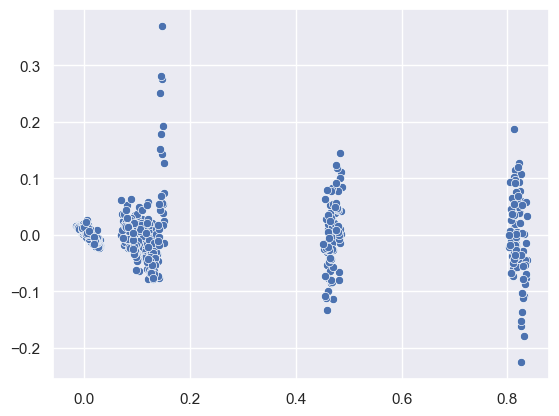

In [201]:
pred_val = response.fittedvalues.copy()
true_val = df4['CASOS_NORMALIZADOS'].values.copy()
residual = true_val - pred_val

sns.scatterplot(x = pred_val, y = residual)

Há uma concentração das variâncias próximas ao zero, porém há uma tendência de de aumento.